# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [13]:
image = imread('data/image.jpg')


Analizala

In [4]:
image.shape

(630, 1200, 3)

In [5]:
image.size

2268000

Muestra la imagen para ver que se ha cargado bien

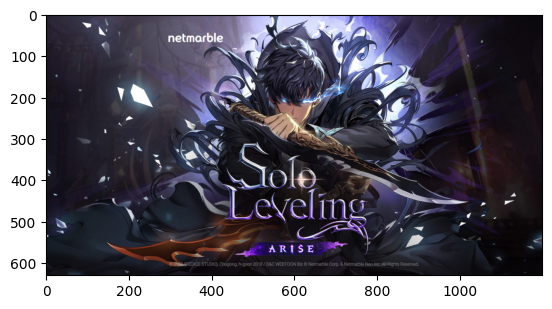

In [6]:
plt.imshow(image)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [16]:
image.shape

(630, 1200, 3)

In [18]:
imagen_transformada = image.reshape(756000, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [19]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(imagen_transformada)

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [20]:
kmeans.cluster_centers_

array([[115.39364823, 111.69292278, 159.64607448],
       [ 45.03104406,  41.85219356,  58.75757077],
       [201.76799895, 205.22353609, 238.18819269],
       [ 17.88324103,  13.91152917,  19.34378041],
       [168.3843702 , 135.20151104, 118.5490497 ],
       [152.3714212 , 152.15561861, 204.87060442],
       [240.75902564, 244.49776176, 248.77367595],
       [ 89.71263932,  86.29369233, 117.83188192],
       [ 67.54709801,  62.41068804,  82.25591541],
       [ 30.94895409,  27.09068474,  36.82926442]])

In [21]:
kmeans.labels_

array([9, 9, 9, ..., 3, 3, 3])

In [28]:
image.shape

(630, 1200, 3)

In [30]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [32]:
segmented_img = segmented_img.reshape(image.shape)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

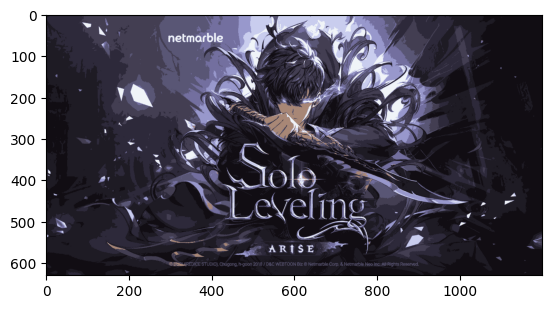

In [33]:
plt.imshow(segmented_img.astype(np.uint8))

In [35]:
import cv2

cv2.imwrite('data/segmented_image.jpg', segmented_img.astype(np.uint8))

True

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [ ]:
def reducir_colores(imagen, num_colores, guardar=False, nombre_archivo=None):
    # Modificar la estructura de la imagen
    alto, ancho, _ = imagen.shape
    imagen_vector = imagen.reshape(alto * ancho, 3)

    # Aplicar K-means para reducir el número de colores
    kmeans = KMeans(n_clusters=num_colores, random_state=42)
    kmeans.fit(imagen_vector)
    labels = kmeans.labels_
    centros = kmeans.cluster_centers_
    imagen_reducida = centros[labels]

    # Reshape de la imagen reducida a su forma original
    imagen_reducida = imagen_reducida.reshape(alto, ancho, 3)

    # Mostrar o guardar la imagen según los parámetros especificados
    if guardar:
        cv2.imwrite(nombre_archivo, imagen_reducida.astype(np.uint8))
    else:
        plt.imshow(imagen_reducida.astype(np.uint8))
        plt.axis('off')
        plt.show()